# <font color='yellow'> Computer Vision

<font color=yellow> **The objective of this project is twofold: to delve into the study of computer vision while advancing further in the exploration of Jupyter Notebook and Python.**

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

# About

In this introductory phase of our exploration into computer vision, we delve into the fascinating realm of Optical Character Recognition (OCR). This pivotal technology enables machines to decipher text embedded within images, paving the way for a myriad of applications across various domains. By leveraging OCR, we embark on a journey to not only comprehend its fundamental workings but also to wield its power through practical demonstrations encompassing diverse textual and visual contexts. Through this process, we aim not merely to decipher text but to impart meaning to the machine, enriching our understanding of the versatile applications within the expansive landscape of computer vision.

In [1]:
# Installs

# !pip install opencv-python
# !pip install pytesseract

# Imports

import pytesseract
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from pytesseract import Output
import os
import re


# Setting path location

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
tessdata_dir = "C:\\Program Files\\Tesseract-OCR\\tessdata"
os.environ['TESSDATA_PREFIX'] = tessdata_dir

In [2]:
# Function to read on jupyter notebook (To avoid openning new window)

def load_image(img):
    if img is None:
        print('Error loading image')
    else:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
def load_image_rgb(img):
    if img is None:
        print('Error loading image')
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
def load_image_gray(img):
    if img is None:
        print('Error loading image')
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()

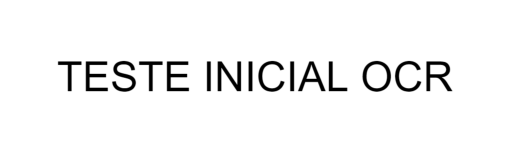

In [3]:
# Test image

img = cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula1-teste.png')
load_image(img)

In [4]:
# Test tesseract

text = pytesseract.image_to_string(img)
print(text)

TESTE INICIAL OCR



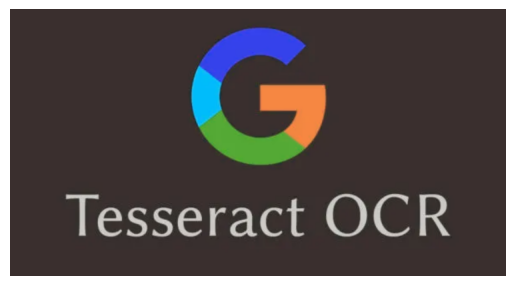

In [5]:
# BGR Image

img_bgr = cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula1-ocr.png')
load_image(img_bgr)

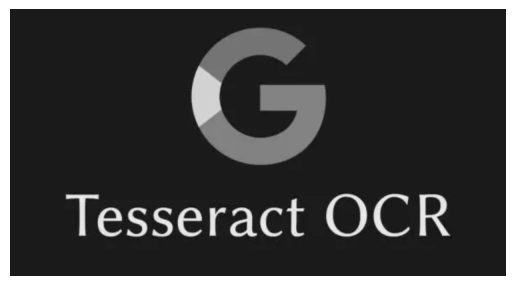

In [6]:
# Gray Image

img_gray = cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula1-ocr.png')
load_image_gray(img_gray)

In [7]:
# Checking img to text

text_bgr = pytesseract.image_to_string(img_bgr)
text_gray = pytesseract.image_to_string(img_gray)

print(text_bgr, text_gray)

G

Tesseract OCR
 G

Tesseract OCR



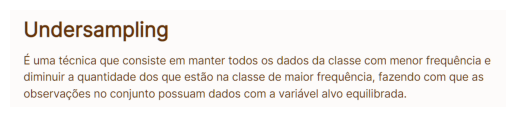

In [8]:
# Different Characters

img_different = cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula2-undersampling.png')
load_image(img_different)

In [9]:
# Checking text

text_different = pytesseract.image_to_string(img_different)
print(text_different)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estado na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



We can observe that the words "frequência" and "observações" could not be read exactly as they are.

In [10]:
# Checking languages on tesseract

!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR\tessdata/" (161):
afr
amh
ara
asm
aze
aze_cyrl
bel
ben
bod
bos
bre
bul
cat
ceb
ces
chi_sim
chi_sim_vert
chi_tra
chi_tra_vert
chr
cos
cym
dan
deu
div
dzo
ell
eng
enm
epo
equ
est
eus
fao
fas
fil
fin
fra
frk
frm
fry
gla
gle
glg
grc
guj
hat
heb
hin
hrv
hun
hye
iku
ind
isl
ita
ita_old
jav
jpn
jpn_vert
kan
kat
kat_old
kaz
khm
kir
kmr
kor
lao
lat
lav
lit
ltz
mal
mar
mkd
mlt
mon
mri
msa
mya
nep
nld
nor
oci
ori
osd
pan
pol
por
pus
que
ron
rus
san
script/Arabic
script/Armenian
script/Bengali
script/Canadian_Aboriginal
script/Cherokee
script/Cyrillic
script/Devanagari
script/Ethiopic
script/Fraktur
script/Georgian
script/Greek
script/Gujarati
script/Gurmukhi
script/HanS
script/HanS_vert
script/HanT
script/HanT_vert
script/Hangul
script/Hangul_vert
script/Hebrew
script/Japanese
script/Japanese_vert
script/Kannada
script/Khmer
script/Lao
script/Latin
script/Malayalam
script/Myanmar
script/Oriya
script/Sinhala
script/Syriac
script/Tamil


In [11]:
# Telling tesseract to use the portuguese language

text_different = pytesseract.image_to_string(img_different, lang='por')
print(text_different)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [12]:
# Checking which PSM(Page Segmentation Mode) is inside tesseract

!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


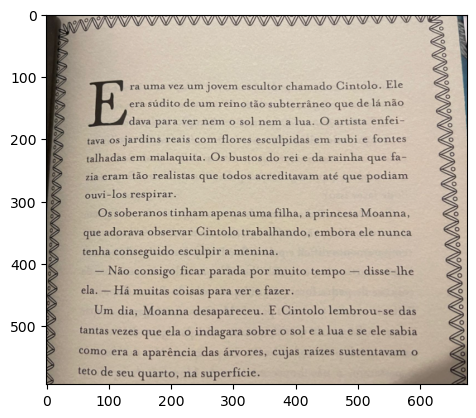

In [13]:
# Using PIL (Python Imagining Library)

img_pil = Image.open('Dados/CV/text-recognize-main/Imagens/Aula2-livro.png')
plt.imshow(img_pil)

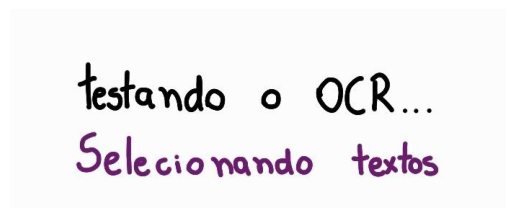

In [14]:
# Image with different letters format

img_testing_3 = cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula3-testando.png')
load_image(img_testing_3)

In [15]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(img_testing_3, lang='por', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  '57.653881',
  '95.777733',
  '69.367599',
  '-1',
  '92.430145',
  '56.535767'],
 'text': ['',
  '',
  '',
  '',
  'testando',
  'o',
  'OCR...',
  '',
  'Selecionando',
  'tests']}

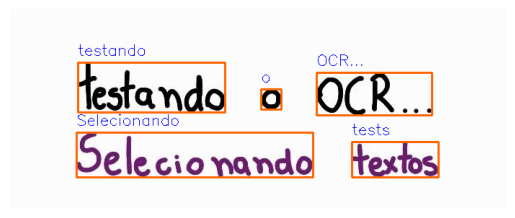

In [16]:
# Bounding Box

def text_box(result, img, color = (255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

    return x, y, img

img_copy = img_testing_3.copy()

for i in range(len(result['text'])):
    confiance = int(float(result['conf'][i]))
    if confiance > 40:
        x, y, img = text_box(result, img_copy)
        text = result['text'][i]
        
        # image that we want to apply - the text we want to apply -  position of the text - font type - text size - text color (in bgr)
        
        cv2.putText(img_copy, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
        
        
load_image(img_copy)

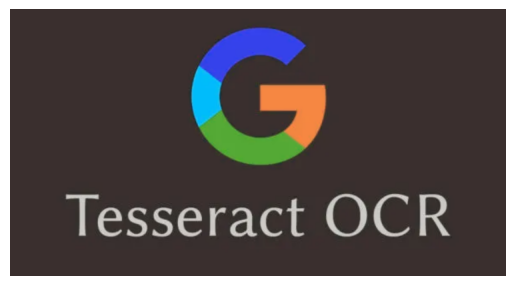

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  '69.070663',
  '-1',
  '-1',
  '-1',
  '90.798775',
  '95.560539'],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}

In [17]:
# Reusing image for tests

img= cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula1-ocr.png')
load_image(img)

config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(img, lang='por', output_type=Output.DICT)
result

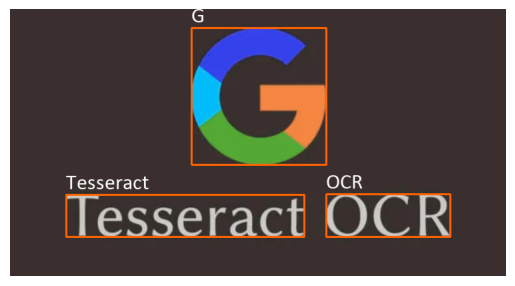

In [18]:
# Creating font

font = 'Dados/CV/text-recognize-main/Imagens/calibri.ttf'

# Function to use special characters

def write_text(text, x, y, img, font, text_size=32):
    font = ImageFont.truetype(font, text_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y - text_size), text, font=font)
    img = np.array(img_pil)
    return img


img_copy = img.copy()

for i in range(len(result['text'])):
    confiance = int(float(result['conf'][i]))
    if confiance > 40:
        x, y, img = text_box(result, img_copy)
        text = result['text'][i]
        
        # cv2.putText(img_copy, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
        
        img_copy = write_text(text, x, y, img_copy, font)
        
load_image(img_copy)

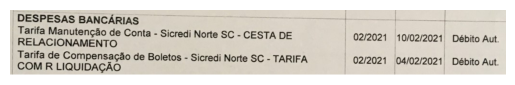

In [19]:
# Testing RE (Regular Expressions) image

img= cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula4-tabela_teste.png')
load_image(img)

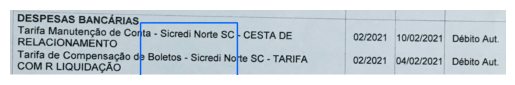

[]


In [20]:
# standardizing the data vocabulary

std_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

date = []

img_copy = img.copy()

for i in range(len(result['text'])):
    confiance = int(float(result['conf'][i]))
    if confiance > 40:
        text = result['text'][i]
        
        if re.match(std_data, text):
            x,y, img = text_box(result, img_copy, (0,0,255))
            img_copy = write_text(text, x, y, img_copy, font, 12)
            date.append(text)
        else:
            x,y, img_copy = text_box(result, img_copy)
        
load_image_rgb(img_copy)
print(date)

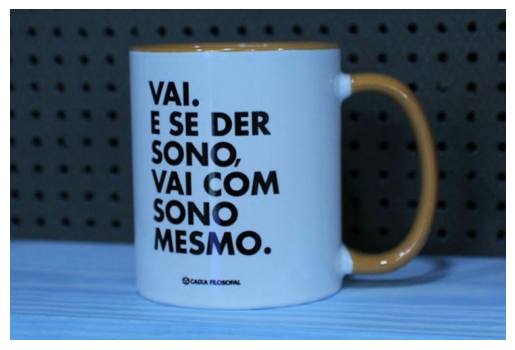

In [21]:
# Natural Scenaries

img= cv2.imread('Dados/CV/text-recognize-main/Imagens/Aula4-caneca2.jpg')
load_image(img)

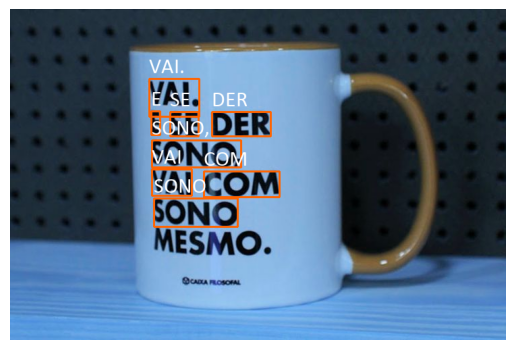

In [22]:
# Checking tesseract

config_tesseract = '--psm 6'

result = pytesseract.image_to_data(img, lang='por', output_type=Output.DICT, config=config_tesseract)

img_copy = img.copy()

for i in range(len(result['text'])):
    confiance = int(float(result['conf'][i]))
    if confiance > 45:
        x, y, img = text_box(result, img_copy)
        text = result['text'][i]        
        img_copy = write_text(text, x, y, img_copy, font)
        
load_image(img_copy)

# Here we can see that in natural scenarios the subject need more treatment

------------------------------------------------

# Final Project

In [23]:
# Checking Project Folder

project = 'Dados/CV/text-recognize-main/Imagens/Project'

# Setting path

path = [os.path.join(project, f) for f in os.listdir(project)]
print(path)

['Dados/CV/text-recognize-main/Imagens/Project\\artigo-desbalanceamento.png', 'Dados/CV/text-recognize-main/Imagens/Project\\artigo-eng-dados.png', 'Dados/CV/text-recognize-main/Imagens/Project\\artigo-spark.png', 'Dados/CV/text-recognize-main/Imagens/Project\\artigo-termos-ML.png']


In [24]:
# Show image function

def show_image(path): 
        fig = plt.gcf()
        fig.set_size_inches(10,15)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

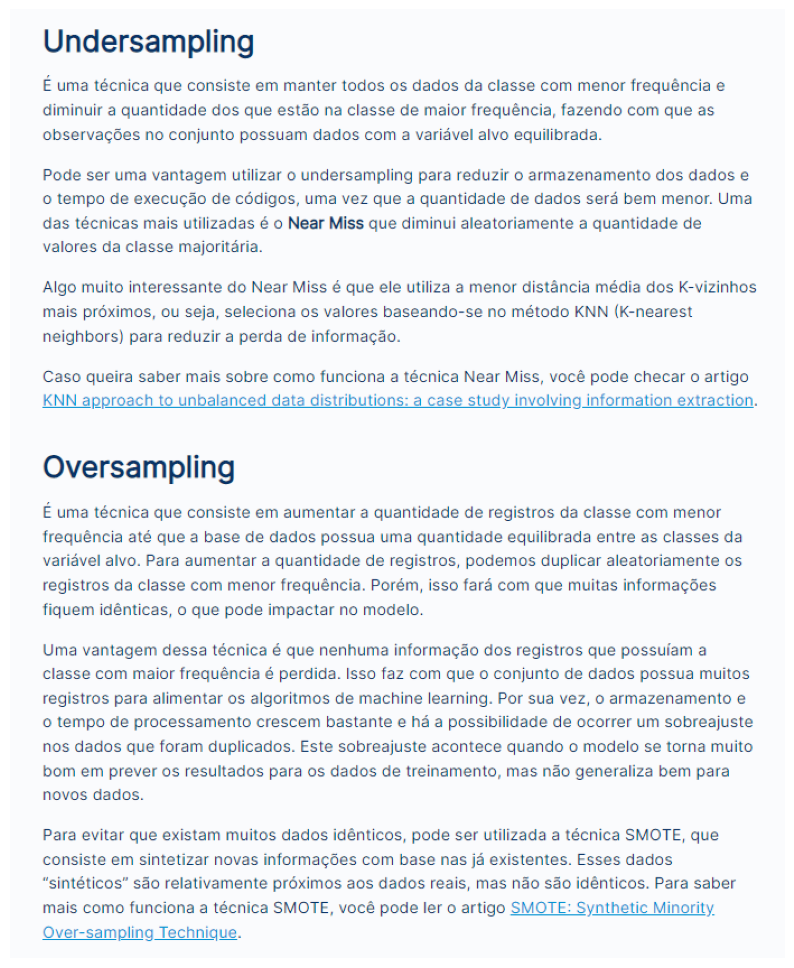

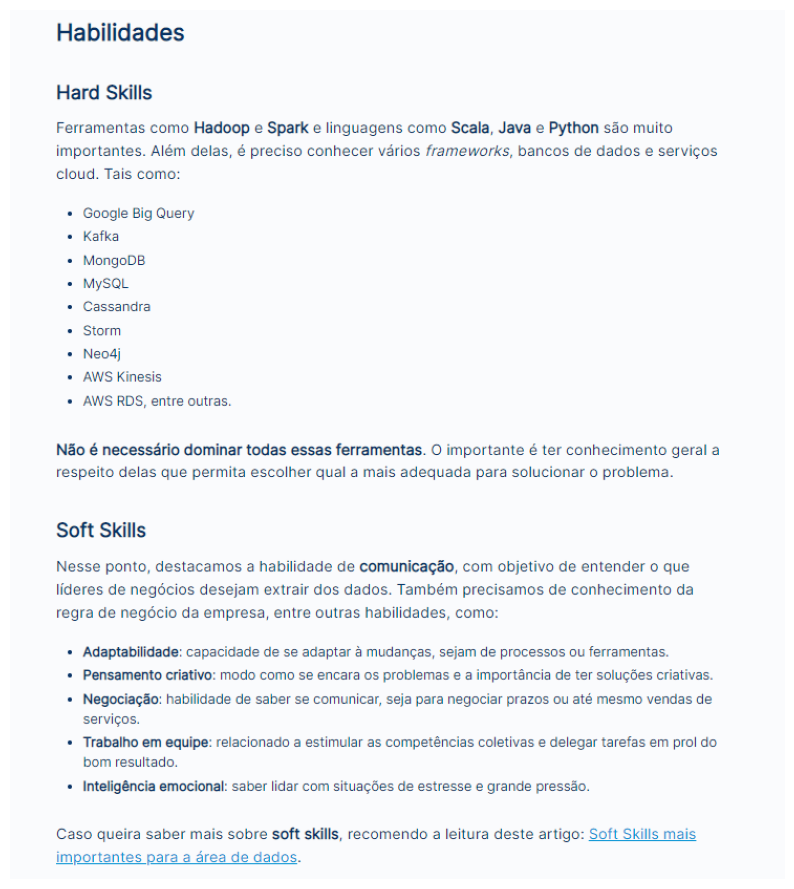

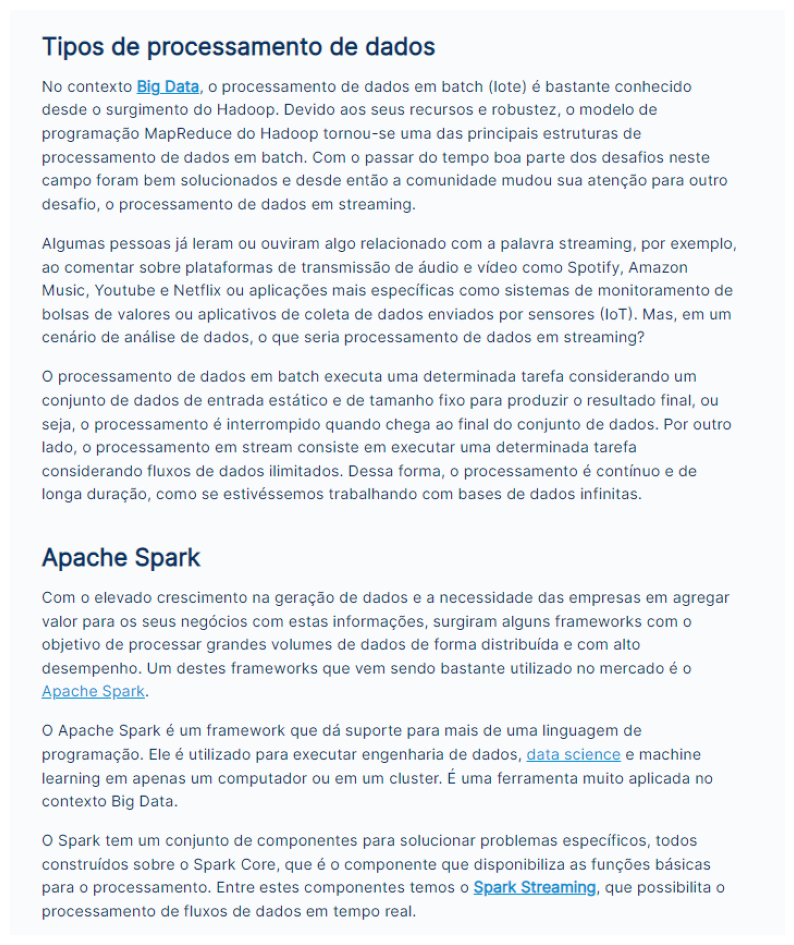

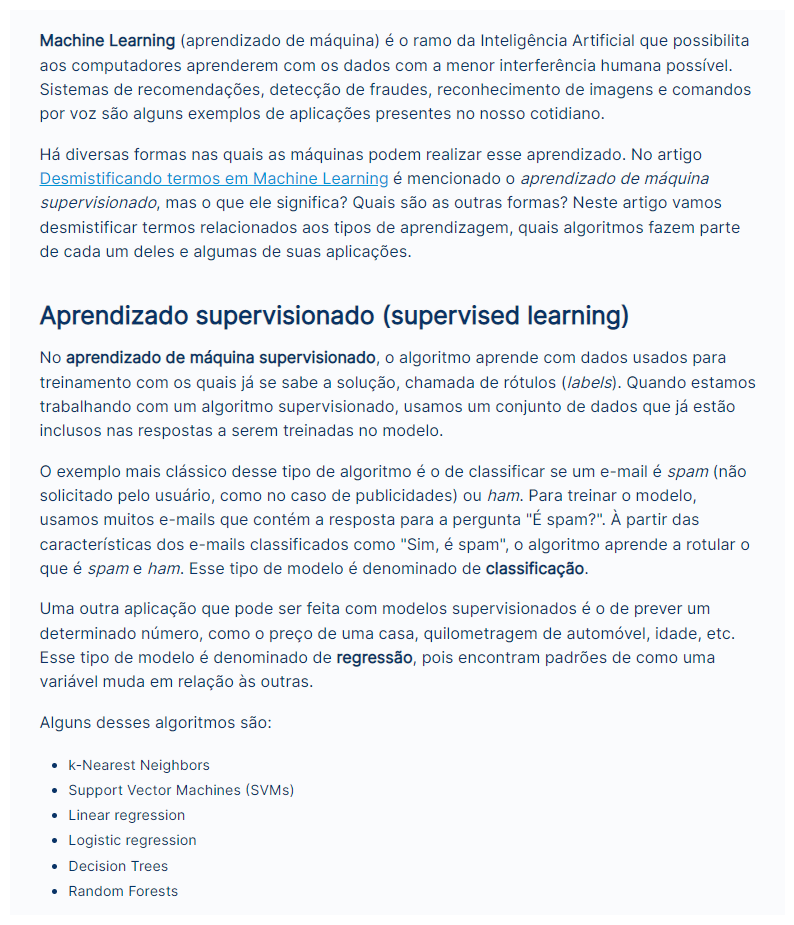

In [25]:
# Showing path images
for image in path:
    image = cv2.imread(image)
    show_image(path)

In [26]:
# Function to process OCR

def ocr_process (img):
    text = pytesseract.image_to_string(img, lang='por')
    return text

In [27]:
# Setting text variables

text_complete = ''
text_name = 'Dados/Results_OCR.txt'

for image in path:
    img = cv2.imread(image)
    img_name = os.path.split(image)[-1] # Receives the names and directories of the images, broken; we only need the -1 (last position of the directory)
    division_name = '===================\n' + str(img_name)
    text_complete = text_complete + division_name + '\n'
    text = ocr_process(img)
    text_complete = text_complete + text
    
text_complete

'===================\nartigo-desbalanceamento.png\nUndersampling\n\nÉ uma técnica que consiste em manter todos os dados da classe com menor frequência e\ndiminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as\nobservações no conjunto possuam dados com a variável alvo equilibrada.\n\nPode ser uma vantagem utilizar o undersampling para reduzir o armazenamento dos dados e\no tempo de execução de códigos, uma vez que a quantidade de dados será bem menor. Uma\ndas técnicas mais utilizadas é o Near Miss que diminui aleatoriamente a quantidade de\nvalores da classe majoritária.\n\nAlgo muito interessante do Near Miss é que ele utiliza a menor distância média dos K-vizinhos\nmais próximos, ou seja, seleciona os valores baseando-se no método KNN (K-nearest\nneighbors) para reduzir a perda de informação.\n\nCaso queira saber mais sobre como funciona a técnica Near Miss, você pode checar o artigo\nKNN approach to unbalanced data distributions: a case study involving

In [28]:
# Saving as txt

txt_file = open(text_name, 'w+') # a+ to add more text w+ to rewrite
txt_file.write(text_complete + '\n')
txt_file.close()

In [29]:
# Searching for occurrence

search_term = 'learning'

with open(text_name) as f: # abre o documento txt
    occurrence = [i.start() for i in re.finditer(search_term, f.read())] #ocorrencia é uma lista. 
    # The process starts at index 'i', and the term 're' stands for regular expressions. The 'finditer' module is used to locate a search term within the file.
    # Therefore, the parameters are, respectively, the search term and the file to be read
occurrence

[1643, 5729, 6951]

In [30]:
# Checking quantity of times the term appears on each image

for image in path:
    img = cv2.imread(image)
    name_image = os.path.split(image)[-1]
    print('====================\n' + str(name_image))
    
    text = ocr_process(img)
    
    occurrence = [i.start() for i in re.finditer(search_term, text)]
    print('Term location and number of times: {}: {}'.format(search_term, len(occurrence)))

artigo-desbalanceamento.png
Term location and number of times: learning: 1
artigo-eng-dados.png
Term location and number of times: learning: 0
artigo-spark.png
Term location and number of times: learning: 1
artigo-termos-ML.png
Term location and number of times: learning: 1


artigo-desbalanceamento.png
Term location and number of times: learning: artigo-desbalanceamento.png


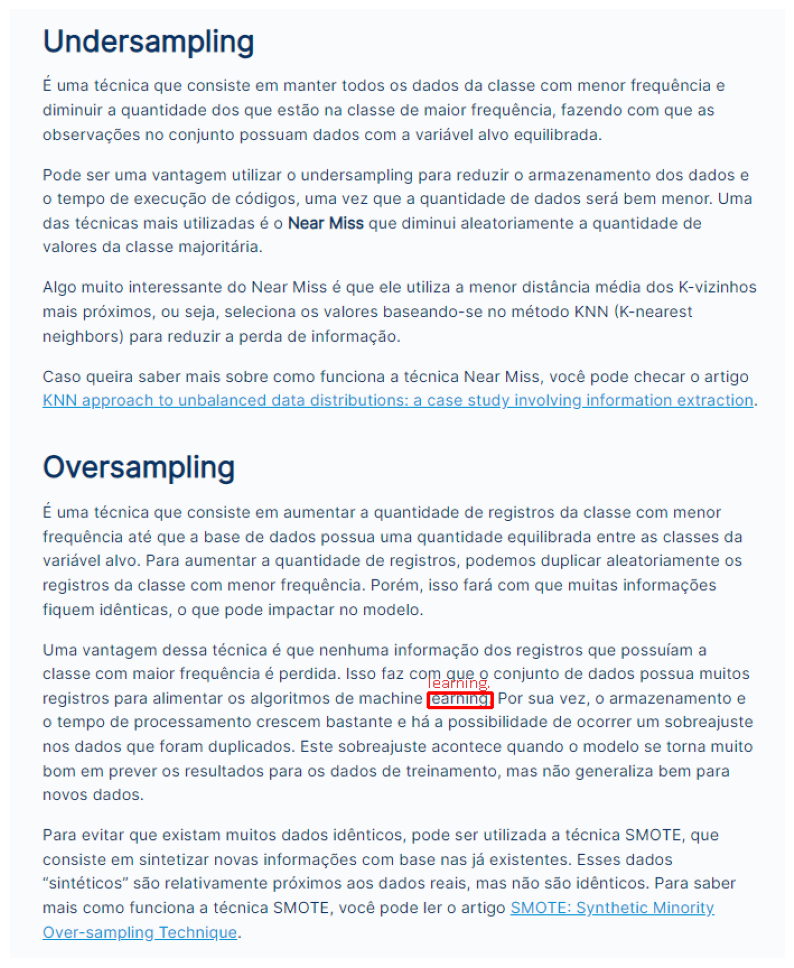

artigo-eng-dados.png
Term location and number of times: learning: artigo-eng-dados.png


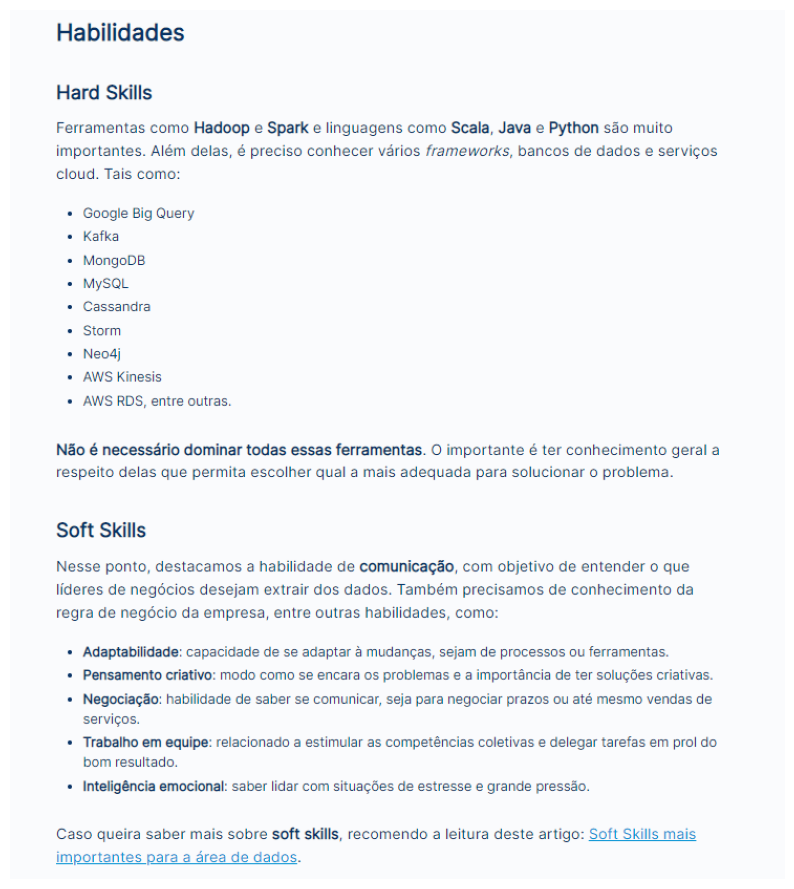

artigo-spark.png
Term location and number of times: learning: artigo-spark.png


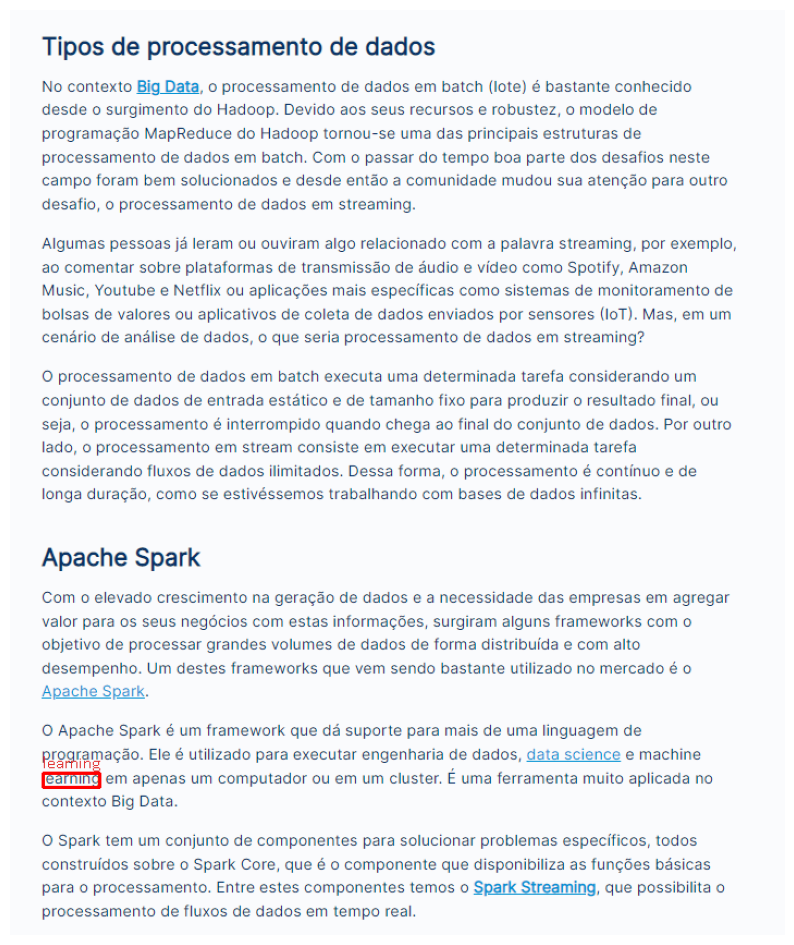

artigo-termos-ML.png
Term location and number of times: learning: artigo-termos-ML.png


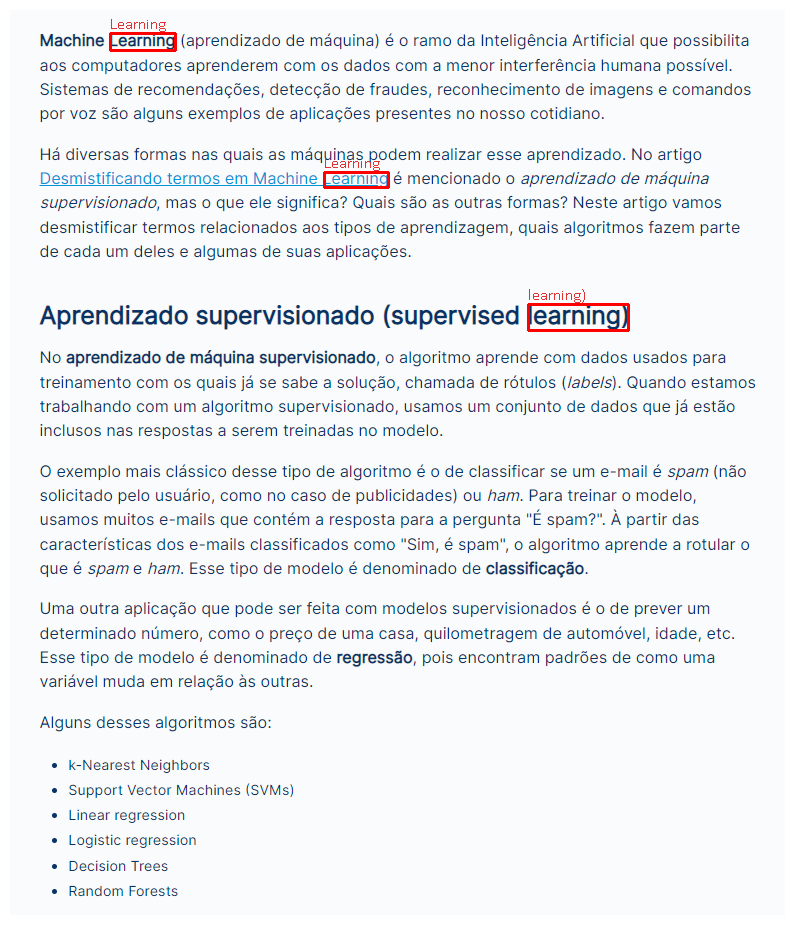

In [31]:
# Image Recognition

# Function to show image

def show_image(img):
    fig = plt.gcf()
    fig.set_size_inches(10,15)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
# Function to write the text above

def write_text(text, x, y, img, font, color, size=16):
    font = ImageFont.truetype(font, size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y - size), text, font=font, fill=color)
    img = np.array(img_pil)
    return img

# Fucntion to create the box

def text_box(i, result, img, color=(0,0,255)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]
    
    cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
    
    return x, y, img

# Function to check where the search terms are in the text

def ocr_process_image(img, search_term):
    
    result = pytesseract.image_to_data(img, lang='por', output_type=Output.DICT)
    occurrence_times = 0
    
    for i in range(0, len(result['text'])):
        confiance = int(float(result['conf'][i]))
        if confiance > 40:
            text = result['text'][i]
            if search_term.lower() in text.lower():
                x, y, img = text_box(i, result, img, (0,0,255))
                img = write_text(text, x, y, img, font, (50,50,225))
            
                occurrence_times += 1
            
    return img, occurrence_times


# Searching in previous image

for image in path:
    
    img = cv2.imread(image)
    img_original = img.copy()
    
    name_image = os.path.split(image)[-1]
    print('====================\n' + str(name_image))
    
    img, occurrence_times = ocr_process_image(img, search_term)
    print('Term location and number of times: {}: {}'.format(search_term, name_image, occurrence_times))
    
    show_image(img)